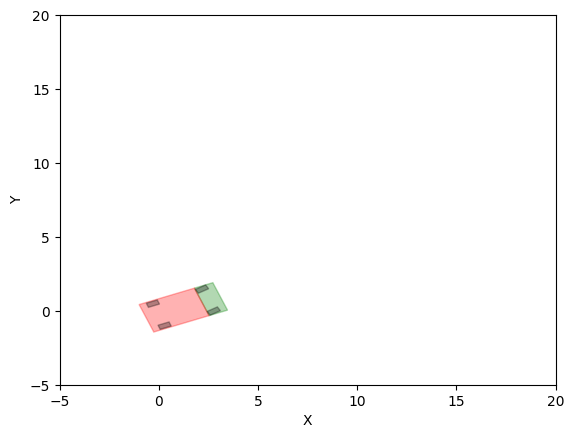

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
%matplotlib inline
import jax.numpy as jnp
from jax import jit

class f150:
    def __init__(self, init_state=np.array([0,0,0,0,0]), ax=None, param_file=None, facecolor="k", alpha=0.3):
        self.ax = ax
        # chassis
        self.width = 2
        self.length = 4
        # wheels
        self.wheel_length = 0.6
        self.wheel_width = 0.3
        self.wheel1_center = np.array([self.length / 3, 2 * self.width / 5]).reshape(
            -1, 1
        )
        self.wheel2_center = np.array([self.length / 3, -2 * self.width / 5]).reshape(
            -1, 1
        )
        self.wheel3_center = np.array([-self.length / 3, -2 * self.width / 5]).reshape(
            -1, 1
        )
        self.wheel4_center = np.array([-self.length / 3, 2 * self.width / 5]).reshape(
            -1, 1
        )
        self.pos = np.array([0, 0]).reshape(-1, 1)
        self.yaw = 0
        self.steering = 0

        self.ax.set_xlim([-5, 20])
        self.ax.set_ylim([-5, 20])

        # Vehcile chassis
        self.base_points = np.array(
            [
                [-self.length / 2, -self.width / 2],
                [self.length / 2, -self.width / 2],
                [self.length / 2, self.width / 2],
                [-self.length / 2, self.width / 2],
            ]
        )
        self.base_front_points = np.array(
            [
                [0.5 * self.length / 2, -self.width / 2],
                [self.length / 2, -self.width / 2],
                [self.length / 2, self.width / 2],
                [0.5 * self.length / 2, self.width / 2],
            ]
        )
        self.base_rear_points = np.array(
            [
                [-self.length / 2, -self.width / 2],
                [0.5 * self.length / 2, -self.width / 2],
                [0.5 * self.length / 2, self.width / 2],
                [-self.length / 2, self.width / 2],
            ]
        )

        R = self.rot_mat(self.yaw)
        R_steering = self.rot_mat(self.steering)

        front_points = (R @ self.base_front_points.T).T + self.pos[0:2, 0]
        self.front_patch = Polygon(
            front_points,
            linewidth=1,
            edgecolor="g",
            facecolor="g",
            label="F150",
            alpha=alpha,
        )
        self.ax.add_patch(self.front_patch)

        rear_points = (R @ self.base_rear_points.T).T + self.pos[0:2, 0]
        self.rear_patch = Polygon(
            rear_points,
            linewidth=1,
            edgecolor="r",
            facecolor="r",
            label="F150",
            alpha=alpha,
        )
        self.ax.add_patch(self.rear_patch)

        # wheels
        self.wheel_points = np.array(
            [
                [-self.wheel_length / 2, -self.wheel_width / 2],
                [self.wheel_length / 2, -self.wheel_width / 2],
                [self.wheel_length / 2, self.wheel_width / 2],
                [-self.wheel_length / 2, self.wheel_width / 2],
            ]
        )
        wheel1_base_points = self.wheel1_center + R_steering @ self.wheel_points.T
        wheel2_base_points = self.wheel2_center + R_steering @ self.wheel_points.T
        wheel3_base_points = self.wheel3_center + R_steering @ self.wheel_points.T
        wheel4_base_points = self.wheel4_center + R_steering @ self.wheel_points.T
        wheel1_points = (R @ wheel1_base_points).T + self.pos[0:2, 0]
        wheel2_points = (R @ wheel2_base_points).T + self.pos[0:2, 0]
        wheel3_points = (R @ wheel3_base_points).T + self.pos[0:2, 0]
        wheel4_points = (R @ wheel4_base_points).T + self.pos[0:2, 0]

        self.wheel1_patch = Polygon(
            wheel1_points,
            linewidth=1,
            edgecolor="k",
            facecolor=facecolor,
            label="F150",
            alpha=alpha,
        )
        self.ax.add_patch(self.wheel1_patch)

        self.wheel2_patch = Polygon(
            wheel2_points,
            linewidth=1,
            edgecolor="k",
            facecolor=facecolor,
            label="F150",
            alpha=alpha,
        )
        self.ax.add_patch(self.wheel2_patch)

        self.wheel3_patch = Polygon(
            wheel3_points,
            linewidth=1,
            edgecolor="k",
            facecolor=facecolor,
            label="F150",
            alpha=alpha,
        )
        self.ax.add_patch(self.wheel3_patch)

        self.wheel4_patch = Polygon(
            wheel4_points,
            linewidth=1,
            edgecolor="k",
            facecolor=facecolor,
            label="F150",
            alpha=alpha,
        )
        self.ax.add_patch(self.wheel4_patch)

    def rot_mat(self, theta):
        return np.array(
            [[np.cos(theta), -np.sin(theta)], [np.sin(theta), np.cos(theta)]]
        )

    def render(self, X):
        self.pos = np.array([X[0], X[1]]).reshape(-1, 1)
        self.yaw = X[2]
        self.steering = X[3]
        R = self.rot_mat(self.yaw)
        R_steering = self.rot_mat(self.steering)

        # Update chassis
        # points = (R @ self.base_points.T).T + self.pos[0:2, 0]
        # self.patch.set_xy(points)
        front_points = (R @ self.base_front_points.T).T + self.pos[0:2, 0]
        self.front_patch.set_xy(front_points)
        rear_points = (R @ self.base_rear_points.T).T + self.pos[0:2, 0]
        self.rear_patch.set_xy(rear_points)

        # Update wheels
        wheel1_base_points = self.wheel1_center + R_steering @ self.wheel_points.T
        wheel2_base_points = self.wheel2_center + R_steering @ self.wheel_points.T
        wheel3_base_points = self.wheel3_center + self.wheel_points.T
        wheel4_base_points = self.wheel4_center + self.wheel_points.T
        wheel1_points = (R @ wheel1_base_points).T + self.pos[0:2, 0]
        wheel2_points = (R @ wheel2_base_points).T + self.pos[0:2, 0]
        wheel3_points = (R @ wheel3_base_points).T + self.pos[0:2, 0]
        wheel4_points = (R @ wheel4_base_points).T + self.pos[0:2, 0]
        self.wheel1_patch.set_xy(wheel1_points)
        self.wheel2_patch.set_xy(wheel2_points)
        self.wheel3_patch.set_xy(wheel3_points)
        self.wheel4_patch.set_xy(wheel4_points)

    @staticmethod
    @jit
    def step(state, control, dt):
        next_state = state + jnp.array([
            state[4] * jnp.cos(state[2]),
            state[4] * jnp.sin(state[2]),
            state[3],
            control[1],
            control[0]
        ]) * dt
        return next_state

class bicycle:

    def __init__(self,init_state = jnp.array([0,0,0,0,0]), dt = 0.05, ax=None):
        self.X = init_state # X, Y, PSI, DELTA, V
        self.dt = dt
        self.ax = ax
        self.body = self.ax.scatter([], [], c='g', alpha=1.0)

    @staticmethod
    @jit
    def step(state, control, dt):
        next_state = state + jnp.array([
            state[4] * jnp.cos(state[2]),
            state[4] * jnp.sin(state[2]),
            state[3],
            control[1],
            control[0]
        ]) * dt

        # put steering constraints

    def render(self,state):
        self.body.set_offsets( state[0], state[1] )

def main():
    plt.ion()
    fig, ax = plt.subplots()
    ax.set_xlabel("X")
    ax.set_ylabel("Y")

    vehicle = f150(ax=ax)
    state = np.array([0,0,0,0,0])
    tf = 5
    dt = 0.05
    t = 0
    
    while t<tf:
        state = vehicle.step(state, np.array([0.1, 0.03]), dt)
        vehicle.render(state)
        
        fig.canvas.draw()
        fig.canvas.flush_events()
        t += dt
        fig.canvas.draw()
        fig.canvas.flush_events()
        

    plt.ioff()


if __name__ == "__main__":
    main()



In [3]:
main()